In [1]:
import pandas as pd

In [2]:
col_list = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

In [3]:
df = pd.read_csv("../data/2023W3.csv", usecols=col_list)

In [4]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [5]:
df.isna().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Vehicle Style         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

In [6]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [7]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [8]:
df['engine_hp'].fillna(0, inplace=True)
df['engine_hp'].fillna(0, inplace=True)

In [29]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp             0
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
above_average         0
dtype: int64

In [10]:
df.rename(columns={'msrp': 'price'}, inplace=True)

**Question 1**
- What is the most frequent observation (mode) for the column transmission_type?

**Answer is: `AUTOMATIC`**

In [11]:
df['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

**Question 2**

- Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

- What are the two features that have the biggest correlation in this dataset?

**Answer is: `highway_mpg and city_mpg`**

In [13]:
col_list = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'price']
num_col = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']
cat_col = ['make', 'model', 'transmission_type', 'vehicle_style']

In [14]:
df[num_col].corr().T


,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.041479,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.780998,-0.415707,-0.424918,0.650095
engine_cylinders,-0.041479,0.780998,1.000000,-0.621606,-0.600776,0.531312
highway_mpg,0.258240,-0.415707,-0.621606,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.600776,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.531312,-0.160043,-0.157676,1.000000


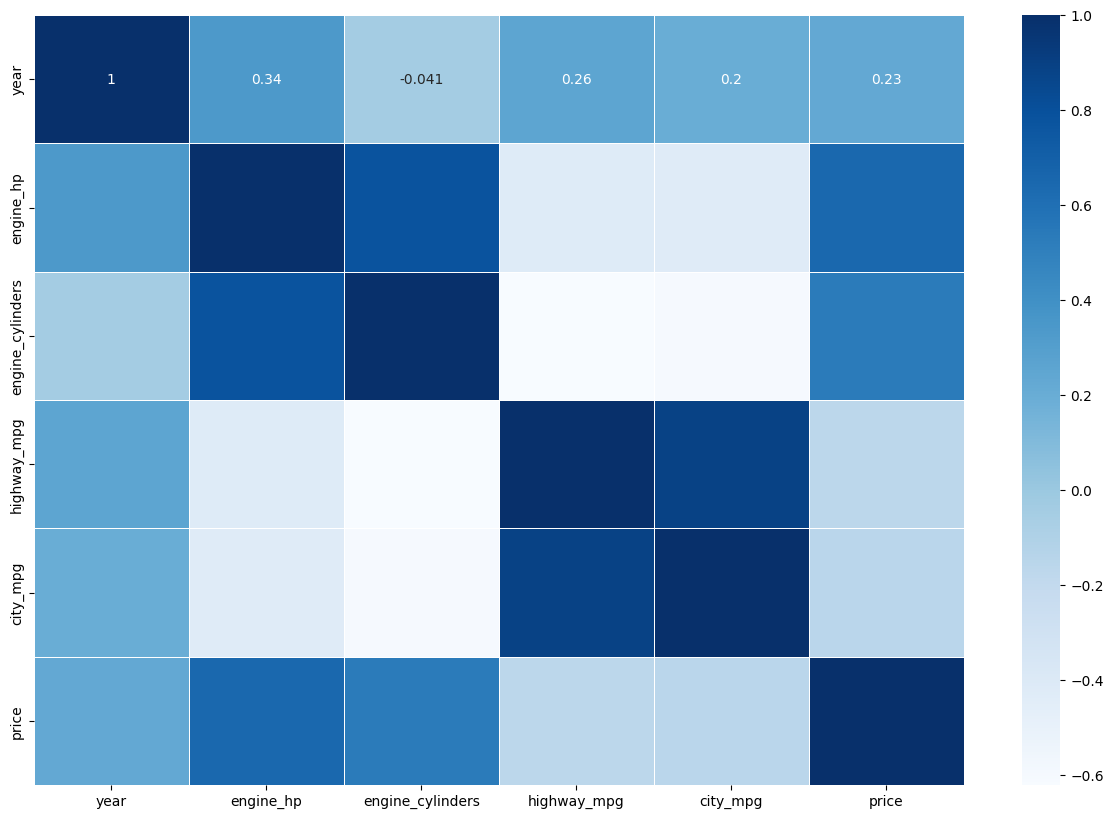

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (15, 10))
sns.heatmap(df[num_col].corr(), annot=True, linewidths=.5, cmap="Blues")
plt.show()

In [16]:
df[num_col].corr().unstack().sort_values(ascending=False)[:10]

year              year                1.000000
engine_hp         engine_hp           1.000000
city_mpg          city_mpg            1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
price             price               1.000000
city_mpg          highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.780998
engine_cylinders  engine_hp           0.780998
dtype: float64

**Make price binary**
- Now we need to turn the price variable from numeric into a binary format.
- Let's create a variable **`above_average`** which is 1 if the price is above its mean value and 0 otherwise.

In [17]:
mean = df['price'].mean()
df['above_average'] = df['price'].apply(lambda x: 1 if x > mean else 0)

In [18]:
df['above_average'].value_counts()

above_average
0    8645
1    3269
Name: count, dtype: int64

In [19]:
# from sklearn.model_selection import train_test_split
X = df[['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'above_average']]
y = df[['price']]

In [20]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train_full : {X_train_full.shape}, X_test : {X_test.shape}, y_train_full : {y_train_full.shape}, y_test: {y_test.shape}")

X_train_full : (9531, 10), X_test : (2383, 10), y_train_full : (9531, 1), y_test: (2383, 1)


In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
print(f"X_train : {X_train.shape}, X_val : {X_val.shape}, y_train : {y_train.shape}, y_val: {y_val.shape}")

X_train : (7148, 10), X_val : (2383, 10), y_train : (7148, 1), y_val: (2383, 1)


**Question 3**
- Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).

**Answer is : `transmission_type `**

In [22]:
X_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int64
dtype: object

In [23]:
from sklearn.metrics import mutual_info_score
# cat_list

def calculate_mi(series):
    return mutual_info_score(series, X_train.above_average)

mi = X_train[cat_col].apply(calculate_mi)
# mi = mi.sort_values(assending=False, )

In [24]:
mi = round(mi.sort_values(ascending=False), 2)
mi

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

**Question 4**
- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

**One Hot Encoding using dictvectorizer**

In [25]:
from sklearn.feature_extraction import DictVectorizer
train_dict = X_train.to_dict(orient='records')
val_dict = X_val.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

oh_X_train = dv.transform(train_dict)
oh_X_val = dv.transform(val_dict)

In [26]:
oh_X_val[:0]

array([], shape=(0, 944), dtype=float64)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [28]:
model.fit(oh_X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [76]:
y_val_pred = model.predict(oh_X_val)

In [77]:
from sklearn.metrics import accuracy_score
import numpy as np
acc = np.round(accuracy_score(y_val, y_val_pred), 2)
acc

In [85]:
acc = np.round(accuracy_score(y_val, y_val_pred), 2)
acc

0.12

**Question 5**
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

In [80]:
cat_list

['make', 'model', 'transmission_type', 'vehicle_style']

In [82]:
features = num_col + cat_list

In [84]:
def create_dict(data, col_list):
    return data[col_list].to_dict(orient= 'records')

In [86]:
orig_acc = acc

for feature in features:
    subset = features.copy()
    subset.remove(feature)
    # print(subset)

    train_dict = create_dict(X_train, subset)
    val_dict = create_dict(X_val, subset)

    dv = DictVectorizer(sparse= False)

    dv.fit(train_dict)

    d_X_train = dv.transform(X_train)
    d_X_val = dv.transform(X_val)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

    model.fit(d_X_train, y_train)

    y_pred = model.predict(d_X_val)

    score = accuracy_score(y_val, y_pred)

    print(f"Column Heading : {feature} , OrigScore - score {orig_acc - score}, Score : {score}")

KeyError: "['price'] not in index"